<a href="https://colab.research.google.com/github/yanncoadou/MLtutorials/blob/main/ML_IDPASC2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>IDPASC 2021 Machine learning hands-on</h1>

# Standard imports and practical functions

In [56]:
# scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_circles
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, roc_auc_score, roc_curve, RocCurveDisplay

import seaborn as sns # seaborn for nice plots
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
np.random.seed(31415) # set the np random seed for reproducibility

### Function to plot decision contours

In [57]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

def my_plot_decision_regions(model, X, y, alpha=1.0, size=25, npts=10000, zoom=0.25, event5=False):

  x1min = X_test[:,0].min() - zoom
  x1max = X_test[:,0].max() + zoom

  x2min = X_test[:,1].min() - zoom
  x2max = X_test[:,1].max() + zoom
  
  x1 = np.random.uniform(x1min, x1max, npts)
  x2 = np.random.uniform(x2min, x2max, npts)

  if hasattr(model, "predict_proba"):
    z = model.predict_proba(np.vstack((x1,x2)).T)
  else:
    z = model.predict(np.vstack((x1,x2)).T)
  
  if len(z.shape) == 2:
    if z.shape[1] == 1:
      z = z.reshape(-1)
    elif z.shape[1] == 2:
      z = z[:,1].reshape(-1)

  fig, ax = plt.subplots()

  bottom = cm.get_cmap('Oranges', 128)
  top = cm.get_cmap('Blues_r', 128)

  newcolors = np.vstack((top(np.linspace(0, 1, 128+128)[-128:]),
                        bottom(np.linspace(0, 1, 128+128)[:128])))
  newcmp = ListedColormap(newcolors, name='OrangeBlue')


  ax.tricontour(x1, x2, z, levels=np.linspace(0.0-np.finfo(float).eps,1.0+np.finfo(float).eps,20,True), linewidths=0.1, colors='k', antialiased=True)
  cntr = ax.tricontourf(x1, x2, z, levels=np.linspace(0.0-np.finfo(float).eps,1.0+np.finfo(float).eps,20,True), cmap=newcmp)
  sctr0 = ax.scatter(X[y==0][:,0], X[y==0][:,1], alpha=alpha, s=size, c="#1f77b4", marker="s", edgecolors="k", linewidths=0.5)
  sctr1 = ax.scatter(X[y==1][:,0], X[y==1][:,1], alpha=alpha, s=size, c="#ff7f0e",  marker="^", edgecolors="k", linewidths=0.5)
  if event5: # showing particular swinger event
    sctr2 = ax.scatter(X[4][0], X[4][1], alpha=1, s=size*10, c="lightgreen",  marker="X", edgecolors="k", linewidths=1)
  fig.colorbar(cntr, ax=ax)
  # ax.set(xlim=(x1min, x1max), ylim=(x2min, x2max))

  plt.show()

### Function to plot ROC curve

In [58]:
def my_plot_roc_curve(model, X_test, y_test):
  if hasattr(model, "predict_proba"):
    y_scores = model.predict_proba(X_test)
  else:
    y_scores = model.predict(X_test)

  if len(y_scores.shape) == 2:
    if y_scores.shape[1] == 1:
      y_scores = y_scores.reshape(-1)
    elif y_scores.shape[1] == 2:
      y_scores = y_scores[:,1].reshape(-1)
  fpr, tpr, _ = roc_curve(y_test, y_scores)
  roc_auc = roc_auc_score(y_test, y_scores)
  plt.clf()
  display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model.__class__.__name__)
  display.plot()
  plt.plot([0, 1], [0, 1], color='black', linestyle='--')
  plt.show()

# Classifier zoo

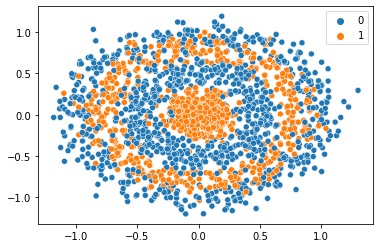

In [59]:
# X = (x,y) coordinates; y = class
X1, y1 = make_circles(n_samples=1000, noise=0.1, factor=0.8)
X2, y2 = make_circles(n_samples=1000, noise=0.2, factor=0.2)
X = np.vstack((X1,X2/2))
y = np.hstack((y1,y2))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

### Decision tree

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

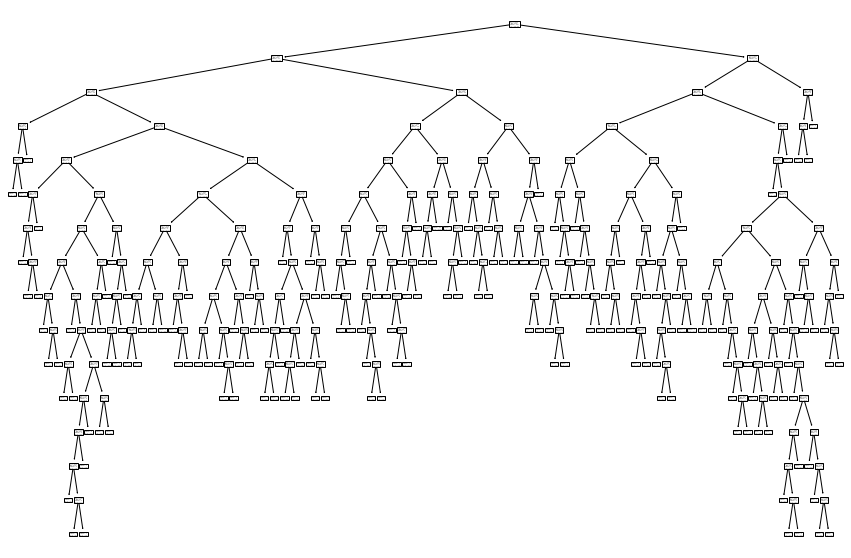

In [62]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(dtc)
plt.show()


In [63]:
accuracy_score(y_test, dtc.predict(X_test))

0.773

Access to results:
- `predict` returns the class (0 or 1 if binary classifier)
- `predict_proba` returns the probability of each class



In [64]:
print("predict: \n",dtc.predict(X_test[:5]))
print("predict_proba: \n",dtc.predict_proba(X_test[:5]))

predict: 
 [1 1 1 0 1]
predict_proba: 
 [[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [65]:
try:
  from mlxtend.plotting import plot_decision_regions
except ImportError as e:
  !pip install mlxtend
  from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


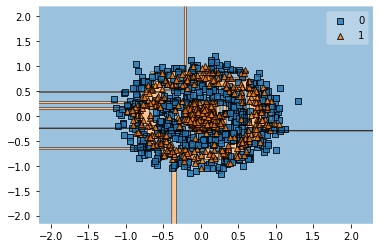

In [66]:
# practical but limited contour-plotting function
plot_decision_regions(X_test, y_test, dtc)

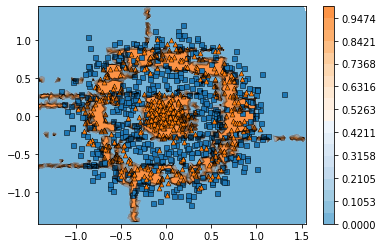

In [67]:
# defined at top of notebook
# can use class (0 or 1) or class probability when available
my_plot_decision_regions(dtc, X_test, y_test)

<Figure size 432x288 with 0 Axes>

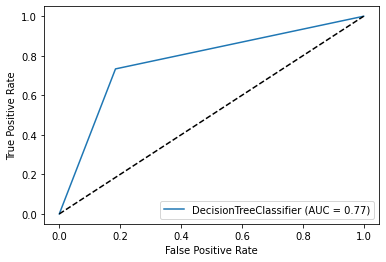

In [68]:
my_plot_roc_curve(dtc, X_test, y_test)

### AdaBoost

In [69]:
from sklearn.ensemble import AdaBoostClassifier

In [70]:
#abc = AdaBoostClassifier()
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),n_estimators=100)
abc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=4,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [71]:
print("predict: \n",abc.predict(X_test[:5]))
print("predict_proba: \n",abc.predict_proba(X_test[:5]))

predict: 
 [1 1 1 0 0]
predict_proba: 
 [[0.20450422 0.79549578]
 [0.21543901 0.78456099]
 [0.33026306 0.66973694]
 [0.77031752 0.22968248]
 [0.59000485 0.40999515]]


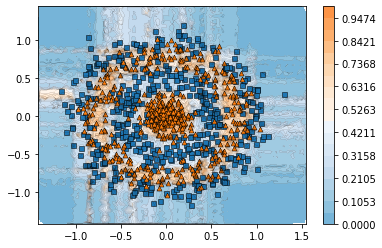

<Figure size 432x288 with 0 Axes>

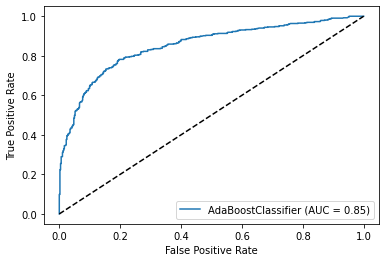

In [72]:
my_plot_decision_regions(abc, X_test, y_test)
my_plot_roc_curve(abc, X_test, y_test)

### Gradient boosting

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
gbc = GradientBoostingClassifier(n_estimators=400)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=400,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [75]:
print("predict: \n",gbc.predict(X_test[:5]))
print("predict_proba: \n",gbc.predict_proba(X_test[:5]))

predict: 
 [1 1 1 0 0]
predict_proba: 
 [[0.02772398 0.97227602]
 [0.21257577 0.78742423]
 [0.20177229 0.79822771]
 [0.62777439 0.37222561]
 [0.69886414 0.30113586]]


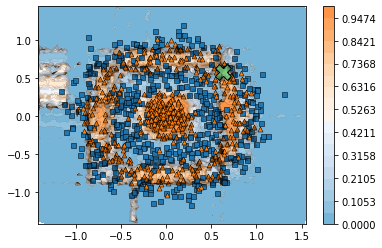

<Figure size 432x288 with 0 Axes>

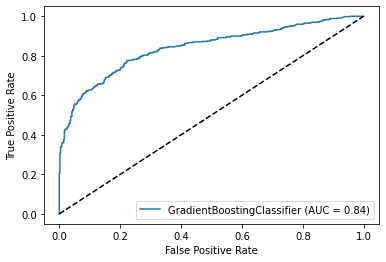

In [76]:
my_plot_decision_regions(gbc, X_test, y_test, event5=True)
my_plot_roc_curve(gbc, X_test, y_test)

### Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rfc = RandomForestClassifier(n_estimators=400)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
print("predict: \n",rfc.predict(X_test[:5]))
print("predict_proba: \n",rfc.predict_proba(X_test[:5]))

predict: 
 [1 1 1 0 1]
predict_proba: 
 [[0.     1.    ]
 [0.2275 0.7725]
 [0.2525 0.7475]
 [0.5525 0.4475]
 [0.31   0.69  ]]


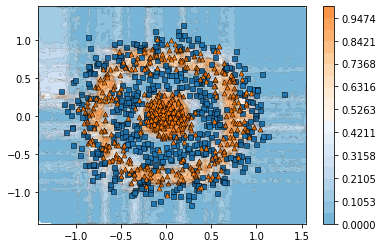

<Figure size 432x288 with 0 Axes>

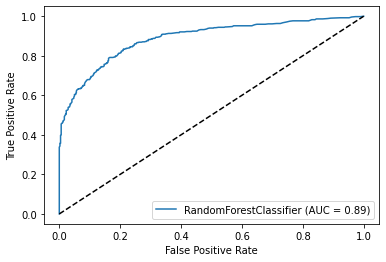

In [80]:
my_plot_decision_regions(rfc, X_test, y_test)
my_plot_roc_curve(rfc, X_test, y_test)

### Comparison

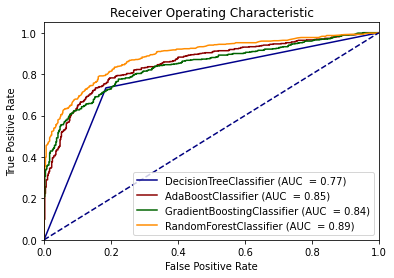

In [81]:
y_preds_dtc = dtc.predict_proba(X_test)[:,1].reshape(-1)
y_preds_abc = abc.predict_proba(X_test)[:,1].reshape(-1)
y_preds_gbc = gbc.predict_proba(X_test)[:,1].reshape(-1)
y_preds_rfc = rfc.predict_proba(X_test)[:,1].reshape(-1)
fpr_dtc,tpr_dtc,_ = roc_curve(y_true=y_test, y_score=y_preds_dtc)
fpr_abc,tpr_abc,_ = roc_curve(y_true=y_test, y_score=y_preds_abc)
fpr_gbc,tpr_gbc,_ = roc_curve(y_true=y_test, y_score=y_preds_gbc)
fpr_rfc,tpr_rfc,_ = roc_curve(y_true=y_test, y_score=y_preds_rfc)
auc_test_dtc = roc_auc_score(y_true=y_test, y_score=y_preds_dtc)
auc_test_abc = roc_auc_score(y_true=y_test, y_score=y_preds_abc)
auc_test_gbc = roc_auc_score(y_true=y_test, y_score=y_preds_gbc)
auc_test_rfc = roc_auc_score(y_true=y_test, y_score=y_preds_rfc)
plt.plot(fpr_dtc, tpr_dtc, color='darkblue',label='{} (AUC  = {})'.format(dtc.__class__.__name__,np.round(auc_test_dtc,decimals=2)))
plt.plot(fpr_abc, tpr_abc, color='darkred',label='{} (AUC  = {})'.format(abc.__class__.__name__,np.round(auc_test_abc,decimals=2)))
plt.plot(fpr_gbc, tpr_gbc, color='darkgreen',label='{} (AUC  = {})'.format(gbc.__class__.__name__,np.round(auc_test_gbc,decimals=2)))
plt.plot(fpr_rfc, tpr_rfc, color='darkorange',label='{} (AUC  = {})'.format(rfc.__class__.__name__,np.round(auc_test_rfc,decimals=2)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")


### Neural networks
It is possible to use neural networks from scikit-learn (`from sklearn.neural_network import MLPClassifier`). In the following we will use more advanced implementations with [Tensorflow](https://www.tensorflow.org).

In [28]:
try:
  import tensorflow as tf
except ImportError as e:
  !pip install tensorflow
  import tensorflow as tf
print (tf.__version__)  # preinstalled version 2.6.0 20210824
from tensorflow import keras

2.6.0


In [29]:
model = keras.models.Sequential(
    [
     keras.layers.Dense(128, activation='relu', input_shape=(2,)),
     keras.layers.Dense(128, activation='relu'),
     keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy', keras.metrics.AUC()])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               384       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train, y_train,
          validation_split=0.2,
          epochs=1000,
          callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

Epoch 1/1000
25/25 [==============================] - 1s 12ms/step - loss: 0.6714 - accuracy: 0.5512 - auc: 0.6650 - val_loss: 0.6652 - val_accuracy: 0.5550 - val_auc: 0.7431
Epoch 2/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.6455 - accuracy: 0.6850 - auc: 0.7316 - val_loss: 0.6415 - val_accuracy: 0.7600 - val_auc: 0.7442
Epoch 3/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.6271 - accuracy: 0.7200 - auc: 0.7340 - val_loss: 0.6139 - val_accuracy: 0.7500 - val_auc: 0.7462
Epoch 4/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.6045 - accuracy: 0.7000 - auc: 0.7394 - val_loss: 0.5889 - val_accuracy: 0.6950 - val_auc: 0.7458
Epoch 5/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.5901 - accuracy: 0.6363 - auc: 0.7413 - val_loss: 0.5779 - val_accuracy: 0.7000 - val_auc: 0.7442
Epoch 6/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.5821 - accuracy: 0.6737 - auc: 0.7340 - val_loss: 0.5

In [31]:
print("predict: \n",model.predict(X_test[:5]))
accuracy_score(y_test, model.predict(X_test).round())

predict: 
 [[0.99998665]
 [0.66072685]
 [0.46033686]
 [0.4509893 ]
 [0.64151776]]


0.825

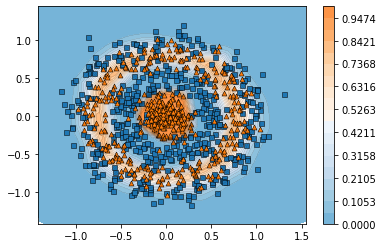

<Figure size 432x288 with 0 Axes>

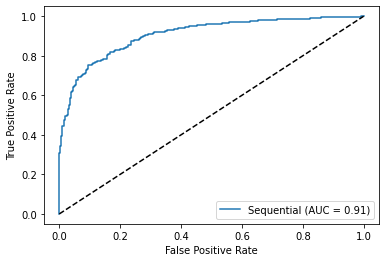

In [33]:
my_plot_decision_regions(model, X_test, y_test)
my_plot_roc_curve(model, X_test, y_test)

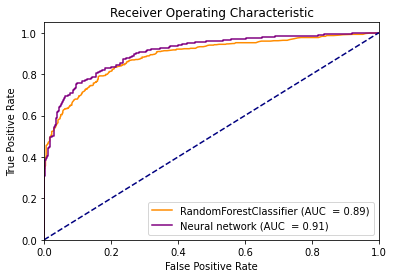

In [35]:
y_preds_model = model.predict(X_test)
fpr_model,tpr_model,_ = roc_curve(y_true=y_test, y_score=y_preds_model)
auc_test_model = roc_auc_score(y_true=y_test, y_score=y_preds_model)
plt.plot(fpr_rfc, tpr_rfc, color='darkorange',label='{} (AUC  = {})'.format(rfc.__class__.__name__,np.round(auc_test_rfc,decimals=2)))
plt.plot(fpr_model, tpr_model, color='purple',label='{} (AUC  = {})'.format("Neural network",np.round(auc_test_model,decimals=2)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")


# High energy physics application

## Input dataset

Data created from ATLAS Open Data by David Rousseau. See doc:

http://opendata.atlas.cern/release/2020/documentation/datasets/intro.html

### Downloading dataset

In [3]:
import os
filename="dataWW_d1_600k.csv.gz"
if not os.path.isfile(filename):
  try:
    import gdown
  except ImportError as e:
    !pip install gdown
    import gdown
  !gdown https://drive.google.com/uc?id=1nlXp7P-xq_jip4aPE0j0mnPhYnIOcBv4
!ls -lrt

# Loading dataset
dfall = pd.read_csv(filename) 
print ("File loaded with ",dfall.shape[0], " events ")


Downloading...
From: https://drive.google.com/uc?id=1nlXp7P-xq_jip4aPE0j0mnPhYnIOcBv4
To: /content/dataWW_d1_600k.csv.gz
35.9MB [00:01, 23.6MB/s]
total 35072
drwxr-xr-x 1 root root     4096 Aug 25 13:35 sample_data
-rw-r--r-- 1 root root 35905611 Aug 30 14:45 dataWW_d1_600k.csv.gz
File loaded with  600000  events 


After downloading message and directory listing, you should now see:

`File loaded with  600000  events`

### Checking the content

In [4]:
#dumping list of features
dfall.columns

Index(['eventNumber', 'label', 'met_et', 'met_phi', 'lep_n', 'lep_pt_0',
       'lep_pt_1', 'lep_eta_0', 'lep_eta_1', 'lep_phi_0', 'lep_phi_1',
       'lep_E_0', 'lep_E_1', 'lep_charge_0', 'lep_charge_1', 'lep_type_0',
       'lep_type_1', 'jet_n', 'jet_pt_0', 'jet_pt_1', 'jet_eta_0', 'jet_eta_1',
       'jet_phi_0', 'jet_phi_1', 'jet_E_0', 'jet_E_1', 'mcWeight', 'runNumber',
       'channelNumber'],
      dtype='object')

In [5]:
#examining first few events
display(dfall.head())

,eventNumber,label,met_et,met_phi,lep_n,lep_pt_0,lep_pt_1,lep_eta_0,lep_eta_1,lep_phi_0,lep_phi_1,lep_E_0,lep_E_1,lep_charge_0,lep_charge_1,lep_type_0,lep_type_1,jet_n,jet_pt_0,jet_pt_1,jet_eta_0,jet_eta_1,jet_phi_0,jet_phi_1,jet_E_0,jet_E_1,mcWeight,runNumber,channelNumber
0,249632,1,25.118,1.14010,2,46.439,44.589,0.131030,0.40654,2.34760,-2.41510,46838.0,48325.0,1,-1,13,11,1,53.680,-7.000,2.4346,-7.00000,-0.76667,-7.00000,308720.0,-7.0,0.000002,284500,345323
1,892975,1,27.974,0.84442,2,86.819,55.438,-0.017265,-0.16338,-1.44520,-1.72950,86832.0,56179.0,1,-1,11,13,1,126.700,-7.000,-1.2789,-7.00000,1.66290,-7.00000,245670.0,-7.0,0.000002,284500,345323
2,730573,0,123.290,-2.94810,2,105.810,40.506,-1.338900,-1.03500,0.68539,-0.90527,215700.0,64211.0,1,-1,13,13,0,-7.000,-7.000,-7.0000,-7.00000,-7.00000,-7.00000,-7.0,-7.0,0.002468,284500,363492
3,717584,0,78.558,1.04450,2,56.666,35.124,2.294600,1.88700,2.13110,-2.83820,283930.0,118570.0,-1,1,11,11,2,79.799,53.942,1.6270,0.55314,-1.84880,-0.47055,211610.0,63629.0,0.000197,284500,363492
4,319020,0,15.863,0.74840,2,94.708,72.811,0.812740,0.77954,1.84940,0.45967,127750.0,96077.0,-1,1,11,11,1,143.180,-7.000,-0.6358,-7.00000,-1.91230,-7.00000,173810.0,-7.0,0.000197,284500,363492


In [6]:
#examining feature distributions
dfall.describe()

,eventNumber,label,met_et,met_phi,lep_n,lep_pt_0,lep_pt_1,lep_eta_0,lep_eta_1,lep_phi_0,lep_phi_1,lep_E_0,lep_E_1,lep_charge_0,lep_charge_1,lep_type_0,lep_type_1,jet_n,jet_pt_0,jet_pt_1,jet_eta_0,jet_eta_1,jet_phi_0,jet_phi_1,jet_E_0,jet_E_1,mcWeight,runNumber,channelNumber
count,6.000000e+05,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,6.000000e+05,6.000000e+05,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,6.000000e+05,6.000000e+05,600000.000000,600000.0,600000.000000
mean,7.029775e+05,0.666667,60.365356,-0.008556,2.005748,60.270328,28.133970,0.000269,-0.000664,0.005219,0.008524,1.164008e+05,5.630948e+04,-0.027027,0.027037,11.907273,11.958010,1.334185,59.606114,13.521164,-1.934521,-4.402337,-1.939645,-4.401941,1.375410e+05,4.125468e+04,0.000218,284500.0,351379.666667
std,4.568961e+05,0.471405,48.153210,1.812778,0.076061,42.676858,20.352272,1.210614,1.235890,1.811177,1.814205,1.083341e+05,5.748834e+04,0.999636,0.999635,0.995692,0.999119,1.232632,79.586143,38.074439,3.349404,3.491304,3.489197,3.559421,1.980717e+05,8.990068e+04,0.000736,0.0,8564.720183
min,1.000000e+00,0.000000,0.044211,-3.141600,2.000000,25.000000,7.000300,-2.700000,-2.699900,-3.141600,-3.141600,2.501300e+04,7.003800e+03,-1.000000,-1.000000,11.000000,11.000000,0.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000e+00,-7.000000e+00,-0.045557,284500.0,345323.000000
25%,3.498568e+05,0.000000,33.196000,-1.577600,2.000000,36.624750,15.316000,-0.899650,-0.946043,-1.560200,-1.562900,5.221675e+04,2.329100e+04,-1.000000,-1.000000,11.000000,11.000000,0.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000e+00,-7.000000e+00,0.000002,284500.0,345323.000000
50%,6.678815e+05,1.000000,50.082000,-0.018694,2.000000,48.229500,23.644000,0.003413,0.002974,0.014583,0.018823,8.184450e+04,3.824900e+04,-1.000000,1.000000,11.000000,11.000000,1.000000,38.744000,-7.000000,-0.891010,-7.000000,-1.210600,-7.000000,7.501700e+04,-7.000000e+00,0.000029,284500.0,345324.000000
75%,1.001273e+06,1.000000,73.032250,1.559300,2.000000,68.979000,34.149000,0.901950,0.942210,1.573000,1.577300,1.412400e+05,6.730825e+04,1.000000,1.000000,13.000000,13.000000,2.000000,84.291250,26.881000,0.724705,-0.821005,0.967753,-1.088575,1.766200e+05,5.060500e+04,0.000197,284500.0,363492.000000
max,1.997995e+06,1.000000,7062.200000,3.141600,5.000000,7041.400000,744.900000,2.699800,2.700000,3.141500,3.141600,7.041600e+06,2.107900e+06,1.000000,1.000000,13.000000,13.000000,13.000000,1658.200000,1429.800000,2.500000,2.500000,3.141600,3.141600,5.638800e+06,2.784300e+06,0.052420,284500.0,363492.000000


### Event weights

In [7]:
label_nevents = (dfall[dfall.label==0].shape[0], dfall[dfall.label==1].shape[0] )
print("Number of events per class (B, S):",label_nevents)

label_weights = (dfall[dfall.label==0].mcWeight.sum(), dfall[dfall.label==1].mcWeight.sum() ) 
print("Total weight per class (B, S):    ",label_weights)

Number of events per class (B, S): (200000, 400000)
Total weight per class (B, S):     (124.66229446419997, 6.200053397600001)


## Event selection

Only keep events with exactly two leptons for this exercise.

Only keep events with positive weight, as many ML tools choke on negative weight.

*Note: This is in principle WRONG, only valid if your positive and negative weight events are statistically similar (could then also take the absolute value of the weight to increase statistics).*


In [11]:
print ("Df shape before selection:", dfall.shape)

fulldata=dfall[ (dfall.lep_n==2) & (dfall.mcWeight > 0)]  

print ("Df shape after selection: ",fulldata.shape)

Df shape before selection: (600000, 29)
Df shape after selection:  (577357, 29)


In [18]:
# Hide label and weights in separate vectors (not discriminating features)
# WARNING : there should be neither selection nor shuffling later on! (otherwise misalignement)
target = fulldata["label"]
weights = fulldata["mcWeight"]

# for simplicity only keep some features
# this is actually making a deep copy from fulldata
data=pd.DataFrame(fulldata, columns=["met_et","met_phi","lep_pt_0","lep_pt_1",'lep_phi_0', 'lep_phi_1'])
#data=pd.DataFrame(fulldata, columns=["met_et","met_phi","lep_pt_0","lep_pt_1",'lep_eta_0', 'lep_eta_1', 'lep_phi_0', 'lep_phi_1','jet_n','jet_pt_0',
#       'jet_pt_1', 'jet_eta_0', 'jet_eta_1', 'jet_phi_0', 'jet_phi_1']

print ("Df shape of dataset to be used:",data.shape)
display(data.head())
print("\nTargets:")
display(target.head())
print("\nWeights:")
display(weights.head())

Df shape of dataset to be used: (577357, 6)


,met_et,met_phi,lep_pt_0,lep_pt_1,lep_phi_0,lep_phi_1
0,25.118,1.14010,46.439,44.589,2.34760,-2.41510
1,27.974,0.84442,86.819,55.438,-1.44520,-1.72950
2,123.290,-2.94810,105.810,40.506,0.68539,-0.90527
3,78.558,1.04450,56.666,35.124,2.13110,-2.83820
4,15.863,0.74840,94.708,72.811,1.84940,0.45967



Targets:


0    1
1    1
2    0
3    0
4    0
Name: label, dtype: int64


Weights:


0    0.000002
1    0.000002
2    0.002468
3    0.000197
4    0.000197
Name: mcWeight, dtype: float64

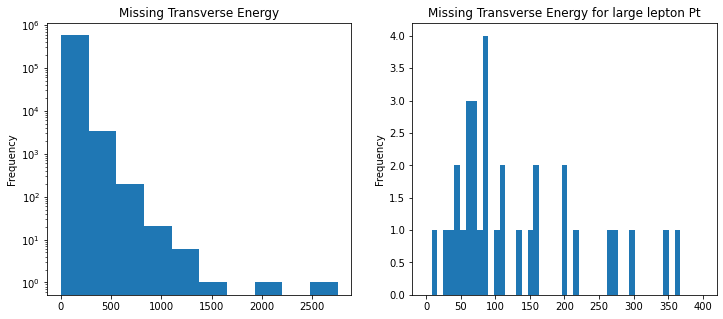

In [28]:
fig,ax=plt.subplots(1, 2, figsize=(12, 5))
data['met_et'].plot.hist(title='Missing Transverse Energy', log=True, ax=ax[0])
data[data.lep_pt_0+data.lep_pt_1>1000]['met_et'].plot.hist(bins=np.linspace(0,400,50),title='Missing Transverse Energy for large lepton Pt', ax=ax[1])

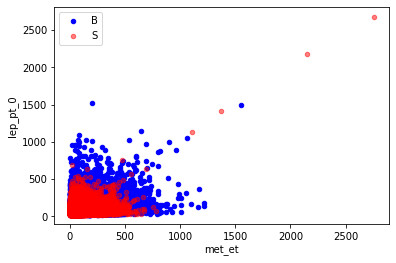

In [30]:
ax=data[target==0].plot.scatter(x='met_et', y='lep_pt_0',color="b",label="B")
data[target==1].plot.scatter(x='met_et', y='lep_pt_0',color="r",label="S",alpha=.5,ax=ax)

# **Installation checks**

## XGBoost

In [ ]:
# preinstalled version 0.9.0 20210824
!pip install xgboost --upgrade # install 1.4.2 20210824
import xgboost as xgb
print(xgb.__version__)

     |████████████████████████████████| 166.7 MB 13 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90
1.4.2


## LightGBM

In [ ]:
# preinstalled version 2.2.3 20210824
!pip install lightgbm --upgrade # install 3.2.1 20210824
import lightgbm as lgb
print (lgb.__version__)

     |████████████████████████████████| 2.0 MB 4.3 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3
3.2.1


In [ ]:
try:
  import tensorflow as tf
except ImportError as e:
  !pip install tensorflow
  import tensorflow as tf
print (tf.__version__)  # preinstalled version 2.6.0 20210824

2.6.0


# Features correlation matrix

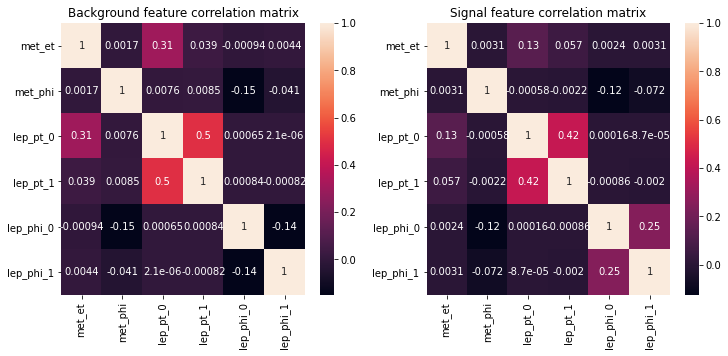

In [ ]:
import seaborn as sn # seaborn for nice plot quicker
fig,ax=plt.subplots(1, 2, figsize=(12, 5))

corrMatrix = data[target==0].corr()
ax[0].set_title("Background features correlation matrix")
sn.heatmap(corrMatrix, ax=ax[0], annot=True)

corrMatrix = data[target==1].corr()
ax[1].set_title("Signal features correlation matrix")
sn.heatmap(corrMatrix, ax=ax[1], annot=True)


# Feature importance
Feature importance allows to display the importance of each feature without rerunnning the training. It is obtained from internal algorithm quantities, like number of time a feature is used to definea leaf. Magnitude is arbitrary. It can be used as a not very reliable indication of which feature is the most discriminant.

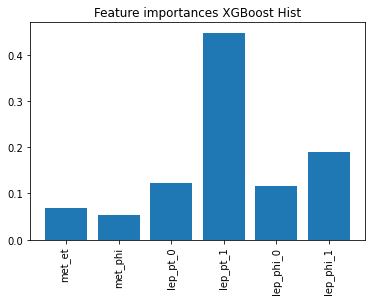

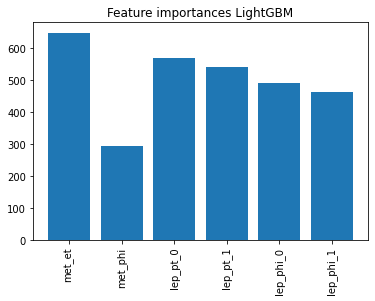

In [ ]:
plt.bar(data.columns.values, xgb.feature_importances_)
plt.xticks(rotation=90)
plt.title("Feature importances XGBoost Hist")
#plt.savefig(new_dir + "/VarImp_BDT_XGBoost_Hist.pdf",bbox_inches='tight')
plt.show()
plt.bar(data.columns.values, gbm.feature_importances_)
plt.xticks(rotation=90)
plt.title("Feature importances LightGBM")
#plt.savefig(new_dir + "/VarImp_BDT_LightGBM.pdf",bbox_inches='tight')
plt.show()


# Permutation importance

A better way to show the importance of each feature is Permutation Importance, where each feature in turn is replaced by an instance of an other event (effectively switching it off by randomising).

However, report can be misleading in case of highly correlated variables.

Available in [Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html]) but without event weights in Colab version (0.22).
   


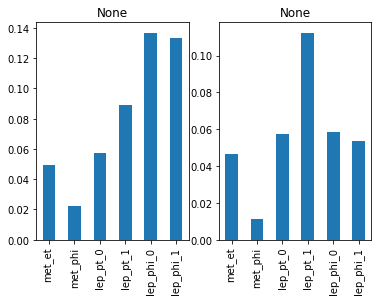

In [ ]:
if True:
  from sklearn.inspection import permutation_importance
  result_xgb = permutation_importance(xgb, X_test, y_test, n_repeats=1, random_state=42, n_jobs=2)
  forest_importances_xgb = pd.Series(result_xgb.importances_mean, index=list(data.columns.values))

  result_gbm = permutation_importance(gbm, X_test, y_test, n_repeats=1, random_state=42, n_jobs=2)
  forest_importances_gbm = pd.Series(result_gbm.importances_mean, index=list(data.columns.values))

  fig, ax = plt.subplots(1,2)
  ax
  forest_importances_xgb.plot.bar(ax = ax[0], subplots=True)
  forest_importances_gbm.plot.bar(ax = ax[1], subplots=True)


Another implementation targetting HEP:

https://github.com/aghoshpub/permutationImportancePhysics 

In particular it allows to : 
   * use event weights
   * display directly the loss in whatever criterion (ROC auc, asimov significance) when the feature is switched off
   * display the feature importance for a specific subset (for example the most signal like)
   * it can even display which feature has the largest impact on systematics


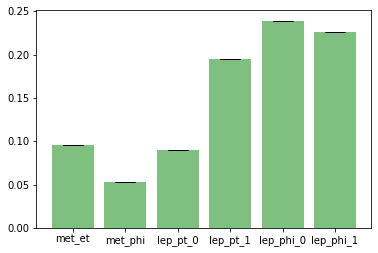

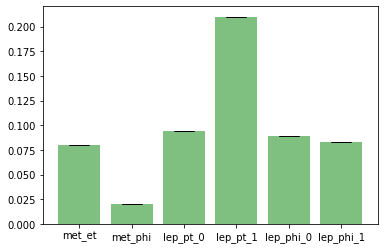

In [ ]:
if True:
    !pip install PermutationImportancePhysics
    from permutationimportancephysics.PermutationImportance import PermulationImportance # note the delibrate typo PermuLation
    PI_xgb = PermulationImportance(model=xgb, X=X_test,y=y_test,weights=weights_test,\
                           n_iterations=1,usePredict_poba=True, scoreFunction="amsasimov", colNames=list(data.columns.values))
    #PI_xgb.dislayResults()
    plott_xgb = PI_xgb.plotBars()
    plott_xgb.show()
    PI_gbm = PermulationImportance(model=gbm, X=X_test,y=y_test,weights=weights_test,\
                           n_iterations=1,usePredict_poba=True, scoreFunction="amsasimov", colNames=list(data.columns.values))
    #PI_gbm.dislayResults()
    plott_gbm = PI_gbm.plotBars()
    plott_gbm.show()
